<a href="https://colab.research.google.com/github/data-alch3m1st/PyTorch_tinkering/blob/main/skorch__0x03c_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
# from torchvision.transforms import ToTensor
from torchvision import datasets, transforms

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.8.0+cu126
torchvision version: 0.23.0+cu126


In [2]:
!pip install skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 8.5 MB/s eta 0:00:00


In [3]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
# MacoOS device agnostic code:

if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

device

'cuda'

In [6]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data" # where to download data to?
    , train=True # get training data
    , download=True # download data if it doesn't exist on disk
    , transform=ToTensor() # images come as PIL format, we want to turn into Torch tensors
    , target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data"
    , train=False # get test data
    , download=True
    , transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 205kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.81MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.6MB/s]


In [7]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [8]:
train_data.data.shape, train_data.targets.shape, test_data.data.shape, test_data.targets.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [9]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


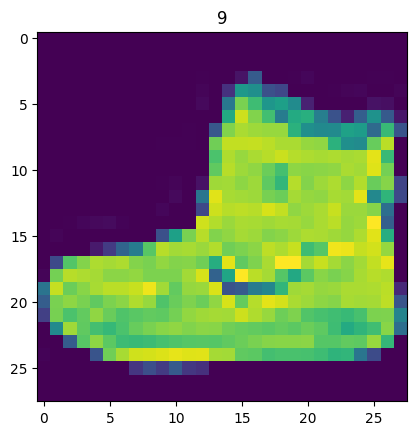

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

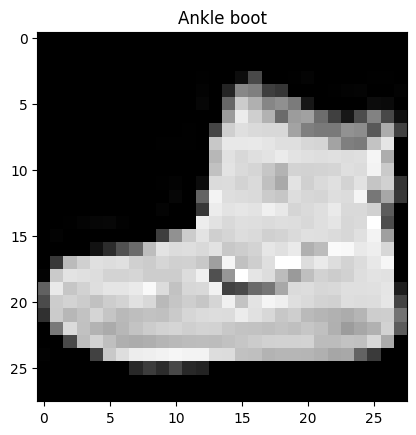

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

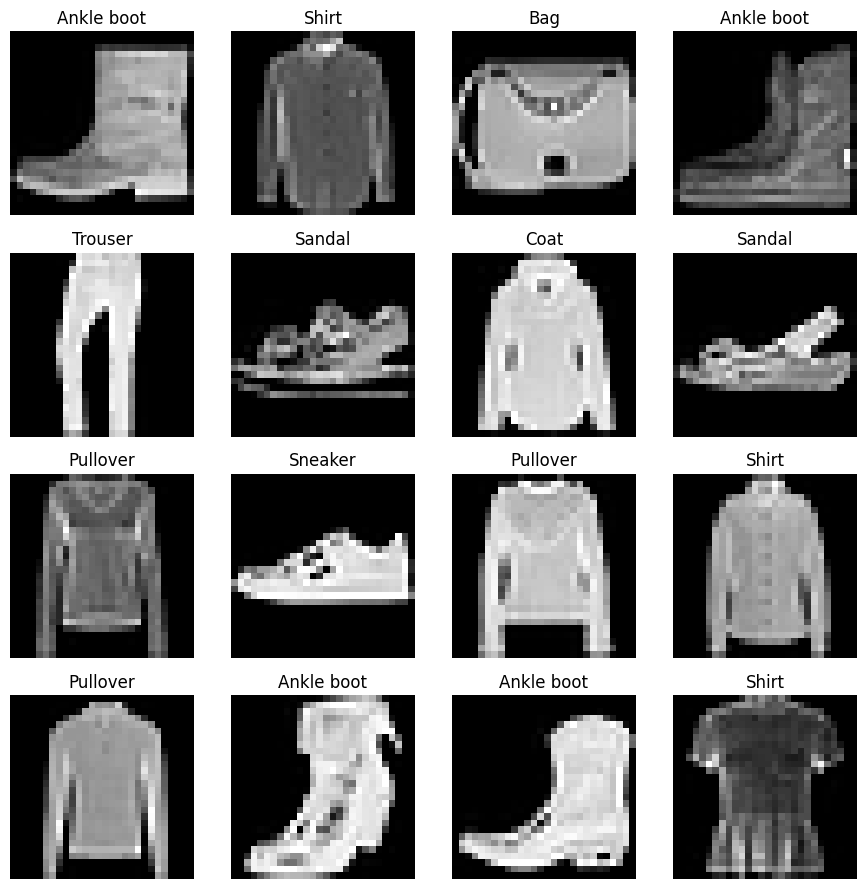

In [12]:
torch.manual_seed(42)  # prevents printing the Generator
rows, cols = 4, 4
fig = plt.figure(figsize=(9, 9))

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), (1,)).item()
    img, label = train_data[random_idx]

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img.squeeze(), cmap="gray")      # this will suppress echo
    ax.set_title(class_names[label])           # and this will too..
    ax.set_axis_off()                          # no echo here... ;)

plt.tight_layout()
plt.show();

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data # dataset to turn into iterable
    , batch_size=BATCH_SIZE # how many samples per batch?
    , shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data, batch_size=BATCH_SIZE
    , shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fbbb9001850>, <torch.utils.data.dataloader.DataLoader object at 0x7fbbb8fb2e70>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))


Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


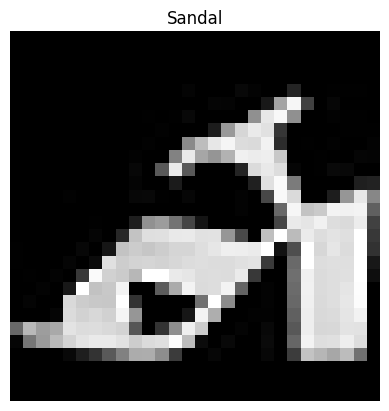

In [16]:
# Show a sample
torch.manual_seed(27)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");

print(f"\nImage size: {img.shape}");
print(f"Label: {label}, label size: {label.shape}");

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
print(x)
print(output)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0392, 0.3333, 0.0431, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.1608, 0.2784, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0196, 0.4941, 0.2549, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.2980, 0.3373, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.3255, 0.2745, 0.5137, 0.7176, 0.6706, 0.6863, 0.6784,
          0.6980, 0.7569, 0.8275, 0.6588, 0.2667, 0.1490, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.2941, 0.2745, 0.2745, 0.3451, 0.3176, 0.3451, 0.3569,
          0.4039, 0.4353, 0.4941, 0.3843, 0.2471, 0.2000,

In [18]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

10160

In [19]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 21.2 MB/s eta 0:00:00


In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn
# Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

import torchmetrics

accuracy_torch_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

accuracy_fn
accuracy_torch_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

MulticlassAccuracy()

In [21]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [22]:
# 1) Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self, channels=32, dropout=0.25):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, channels, kernel_size=3, padding=1)
            , nn.ReLU(inplace=True)
            , nn.MaxPool2d(2)
            , nn.Conv2d(channels, channels * 2, kernel_size=3, padding=1)
            , nn.ReLU(inplace=True)
            , nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten()
            , nn.Dropout(dropout)
            , nn.Linear((channels * 2) * 7 * 7, 128)
            , nn.ReLU(inplace=True)
            , nn.Dropout(dropout)
            , nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [25]:
# 2) Data transforms
transform = transforms.Compose([
    transforms.ToTensor()
    , transforms.Normalize((0.5,), (0.5,))
])

In [26]:
net = NeuralNetClassifier(
    module=SimpleCNN
    , module__channels=32
    , module__dropout=0.25
    , criterion=nn.CrossEntropyLoss
    , optimizer=torch.optim.Adam
    , optimizer__weight_decay=0.0
    , lr=1e-3
    , batch_size=128
    , max_epochs=6
    , iterator_train__shuffle=True
    , device=device
)

In [27]:
# 5) Define param grid (note skorch prefixes module params with 'module__')
param_grid = {
    "module__channels": [16, 32, 64]
    , "module__dropout": [0.0, 0.25, 0.5]
    , "lr": [1e-3, 3e-4]
    , "optimizer": [torch.optim.Adam, torch.optim.SGD]
    , "optimizer__weight_decay": [0.0, 1e-4]
    , "batch_size": [64, 128]
    , "max_epochs": [6]  # keep small for demo
}

In [28]:
# 6) GridSearchCV
grid = GridSearchCV(
    estimator=net
    , param_grid=param_grid
    , scoring="accuracy"
    , n_jobs=1  # set >1 if CPU allows and your model is CPU-bound
    , cv=3
    , refit=True  # refit on full training set with best params
    , verbose=1
)

In [ ]:
# 7) Fit on the training dataset; skorch can take PyTorch datasets directly
grid.fit(train_data, y=None)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [ ]:
# 8) Evaluate on test set
# Build a DataLoader to get predictions easily
test_loader = DataLoader(
    test_data
    , batch_size=256
    , shuffle=False
)

y_true, y_pred = [], []
for X, y in test_loader:
    y_true.append(y.numpy())
    y_pred.append(grid.best_estimator_.predict(X).numpy())

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
test_acc = accuracy_score(y_true, y_pred)
print("Test accuracy:", test_acc)

In [ ]:
# Functionize the train & test loop(s):

def train_step(model: torch.nn.Module
               , data_loader: torch.utils.data.DataLoader
               , loss_fn: torch.nn.Module
               , optimizer: torch.optim.Optimizer
               , accuracy_fn
               , device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(
            y_true=y
            , y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(
    data_loader: torch.utils.data.DataLoader
    , model: torch.nn.Module
    , loss_fn: torch.nn.Module
    , accuracy_fn
    , device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(
                y_true=y
                , y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module
               , data_loader: torch.utils.data.DataLoader
               , loss_fn: torch.nn.Module
               , accuracy_fn
               , device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(
                y_true=y
                , y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__ # only works when model was created with a class
            , "model_loss": loss.item()
            , "model_acc": acc}

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape
                , out_channels=hidden_units
                , kernel_size=3 # how big is the square that's going over the image?
                , stride=1 # default
                , padding=1) # "valid" (no pad) or "same" (output same shape as input) or int for spec num
            , nn.ReLU()
            , nn.Conv2d(in_channels=hidden_units
                      , out_channels=hidden_units
                      , kernel_size=3
                      , stride=1
                      , padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(hidden_units, hidden_units, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten()
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            , nn.Linear(in_features=hidden_units*7*7
                      , out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [ ]:
device

'mps'

In [ ]:
torch.manual_seed(27)
model_2 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=16
    , output_shape=len(class_names)
).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [ ]:
# Setup loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_2.parameters()
    , lr=0.01)

In [ ]:
from tqdm.auto import tqdm

In [ ]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 6
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader
        , model=model_2
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_2
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2
    , end=train_time_end_model_2
    , device=device)

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.26926 | Train accuracy: 53.94%
Test loss: 0.65979 | Test accuracy: 75.02%

Epoch: 1
---------
Train loss: 0.55685 | Train accuracy: 79.73%
Test loss: 0.50010 | Test accuracy: 81.85%

Epoch: 2
---------
Train loss: 0.45020 | Train accuracy: 83.79%
Test loss: 0.43742 | Test accuracy: 84.35%

Epoch: 3
---------
Train loss: 0.40611 | Train accuracy: 85.39%
Test loss: 0.41848 | Test accuracy: 84.83%

Epoch: 4
---------
Train loss: 0.37893 | Train accuracy: 86.42%
Test loss: 0.39526 | Test accuracy: 85.84%

Epoch: 5
---------
Train loss: 0.35926 | Train accuracy: 87.11%
Test loss: 0.36981 | Test accuracy: 86.68%

Train time on mps: 390.770 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.36981454491615295,
 'model_acc': 86.68130990415335}

In [ ]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

torch.manual_seed(27)
model_3 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=32
    , output_shape=len(class_names)
).to(device)

model_3

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

In [ ]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_3.parameters()
    , lr=0.01)

In [ ]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_3 = timer()

# Train and test model
epochs = 9
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader
        , model=model_3
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_3
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_3 = timer()
total_train_time_model_3 = print_train_time(
    start=train_time_start_model_3
    , end=train_time_end_model_3
    , device=device)

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.89853 | Train accuracy: 67.58%
Test loss: 0.54379 | Test accuracy: 80.13%

Epoch: 1
---------
Train loss: 0.47798 | Train accuracy: 82.95%
Test loss: 0.44460 | Test accuracy: 84.09%

Epoch: 2
---------
Train loss: 0.40473 | Train accuracy: 85.66%
Test loss: 0.40498 | Test accuracy: 85.53%

Epoch: 3
---------
Train loss: 0.36373 | Train accuracy: 86.97%
Test loss: 0.37115 | Test accuracy: 86.76%

Epoch: 4
---------
Train loss: 0.33676 | Train accuracy: 87.89%
Test loss: 0.34459 | Test accuracy: 87.84%

Epoch: 5
---------
Train loss: 0.31873 | Train accuracy: 88.66%
Test loss: 0.34991 | Test accuracy: 87.72%

Epoch: 6
---------
Train loss: 0.30305 | Train accuracy: 89.19%
Test loss: 0.34741 | Test accuracy: 87.79%

Epoch: 7
---------
Train loss: 0.29167 | Train accuracy: 89.55%
Test loss: 0.31554 | Test accuracy: 88.77%

Epoch: 8
---------
Train loss: 0.28220 | Train accuracy: 90.00%
Test loss: 0.31135 | Test accuracy: 89.05%

Train time on mps: 602.147 s

In [ ]:
# Get model_2 results
model_3_results = eval_model(
    model=model_3
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_3_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2466222494840622,
 'model_acc': 92.06269968051119}

In [ ]:
# Get model_2 results
model_3_results = eval_model(
    model=model_3
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_3_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.23812277615070343,
 'model_acc': 92.1026357827476}

In [ ]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

torch.manual_seed(27)
model_4 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=28
    , output_shape=len(class_names)
).to(device)

model_4

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1372, out_features=10, bias=True)
  )
)

In [ ]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_4.parameters()
    , lr=0.01)

In [ ]:
optimizer.param_groups[0]['lr']
loss_fn
# model_4.parameters('hidden_units')
model_4.block_1[0]

0.01

CrossEntropyLoss()

Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [ ]:
print(f"Model 4: lr={optimizer.param_groups[0]['lr']}, model params: {model_4.block_1[0]}")

Model 4: lr=0.01, model params: Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
print(f"Model 4: lr={optimizer.param_groups[0]['lr']}, model params: {model_4.block_1[0]}")

torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_4 = timer()

# Train and test model
epochs = 9
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader
        , model=model_4
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_4
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_4 = timer()
total_train_time_model_4 = print_train_time(
    start=train_time_start_model_4
    , end=train_time_end_model_4
    , device=device)

Model 4: lr=0.01, model params: Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.22971 | Train accuracy: 91.59%
Test loss: 0.29399 | Test accuracy: 89.47%

Epoch: 1
---------
Train loss: 0.22478 | Train accuracy: 91.84%
Test loss: 0.27778 | Test accuracy: 89.75%

Epoch: 2
---------
Train loss: 0.22192 | Train accuracy: 91.94%
Test loss: 0.26799 | Test accuracy: 90.16%

Epoch: 3
---------
Train loss: 0.21755 | Train accuracy: 92.04%
Test loss: 0.26147 | Test accuracy: 90.50%

Epoch: 4
---------
Train loss: 0.21415 | Train accuracy: 92.32%
Test loss: 0.25344 | Test accuracy: 90.74%

Epoch: 5
---------
Train loss: 0.21021 | Train accuracy: 92.34%
Test loss: 0.28515 | Test accuracy: 89.94%

Epoch: 6
---------
Train loss: 0.20664 | Train accuracy: 92.48%
Test loss: 0.26141 | Test accuracy: 90.71%

Epoch: 7
---------
Train loss: 0.20367 | Train accuracy: 92.66%
Test loss: 0.26483 | Test accuracy: 90.62%

Epoch: 8
---------
Train loss: 0.20035 | Train accuracy: 92.69%
Test loss: 0.25473 | Test accuracy: 90.94%

Train time on mps: 543.276 s

In [ ]:
print(f"Model 4: lr={optimizer.param_groups[0]['lr']}, model params: {model_4.block_1[0]}")

model_4_results = eval_model(
    model=model_4
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_4_results

Model 4: lr=0.01, model params: Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.27338624000549316,
 'model_acc': 90.45527156549521}

Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [ ]:
# A trick for remembering hidden size and calculating the spatial dementions after going through the layers:

import torch.nn as nn

class FashionMNISTModelV3(nn.Module):
    def __init__(self, hidden_channels=32):
        super().__init__()
        self.hidden_channels = hidden_channels  # <- keep it!
        self.block_1 = nn.Sequential(
            nn.Conv2d(1, hidden_channels, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(hidden_channels, hidden_channels, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_channels, hidden_channels, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(hidden_channels, hidden_channels, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        # 28x28 -> pool2x -> 14x14 -> pool2x -> 7x7; flatten -> hidden_channels*7*7
        """
        Translation --> To calculate our 'in_features': In block1, since the nn.MaxPool2d kernal_size=2, we             DIVIDE 28x28 by 2 (hence 28x28 --> 14x14); then in block2, the same occurs, so 14x14 --> 7x7, which             must be multiplied by our 'hidden_channels'; so for our classifier, we flatten, then build our Linear           Layer with that equation for 'in_features' and our out_features=10, as we have 10 diff't classes;

        nn.Linear(in_features=(hidden_channels * 7 * 7, out_features=10)

        """
        self.classifier = nn.Sequential(
            nn.Flatten(1)
            , nn.Linear(
                in_features=(hidden_channels * 7 * 7)
                , out_features=10),
        )

    def __repr__(self):
        # optional: include hyperparams in repr for easy logging
        base = super().__repr__()
        return f"{base[:-1]}\n  (hidden_channels): {self.hidden_channels}\n)"

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [ ]:
torch.manual_seed(27)
model_0x = FashionMNISTModelV3(
#     input_shape=1
    hidden_channels=64
#     , output_shape=len(class_names)
).to(device)

model_0x

FashionMNISTModelV3(
  (block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )

  (hidden_channels): 64
)

In [ ]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn_0x = nn.CrossEntropyLoss()
optimizer_0x = torch.optim.SGD(
    params=model_0x.parameters()
    , lr=0.007)

In [ ]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_0x = timer()

# Train and test model
epochs = 9
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader
        , model=model_0x
        , loss_fn=loss_fn_0x
        , optimizer=optimizer_0x
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_0x
        , loss_fn=loss_fn_0x
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_0x = timer()
total_train_time_model_0x = print_train_time(
    start=train_time_start_model_0x
    , end=train_time_end_model_0x
    , device=device)

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.24837 | Train accuracy: 90.94%
Test loss: 0.29816 | Test accuracy: 88.99%

Epoch: 1
---------
Train loss: 0.24239 | Train accuracy: 91.20%
Test loss: 0.28087 | Test accuracy: 89.89%

Epoch: 2
---------
Train loss: 0.23673 | Train accuracy: 91.41%
Test loss: 0.28479 | Test accuracy: 89.23%

Epoch: 3
---------
Train loss: 0.23146 | Train accuracy: 91.58%
Test loss: 0.26748 | Test accuracy: 90.34%

Epoch: 4
---------
Train loss: 0.22663 | Train accuracy: 91.86%
Test loss: 0.26710 | Test accuracy: 90.52%

Epoch: 5
---------
Train loss: 0.22175 | Train accuracy: 92.06%
Test loss: 0.27997 | Test accuracy: 89.90%

Epoch: 6
---------
Train loss: 0.21633 | Train accuracy: 92.12%
Test loss: 0.27079 | Test accuracy: 90.29%

Epoch: 7
---------
Train loss: 0.21271 | Train accuracy: 92.28%
Test loss: 0.26669 | Test accuracy: 90.41%

Epoch: 8
---------
Train loss: 0.20844 | Train accuracy: 92.44%
Test loss: 0.26565 | Test accuracy: 90.36%

Train time on mps: 590.522 s

In [ ]:
print(f"Model: lr={optimizer_0x.param_groups[0]['lr']}, model params: {model_0x.block_1[0]}")

model_0x_results = eval_model(
    model=model_0x
    , data_loader=test_dataloader
    , loss_fn=loss_fn_0x
    , accuracy_fn=accuracy_fn
)
model_0x_results

Model: lr=0.007, model params: Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.2656458020210266,
 'model_acc': 90.35543130990415}

In [ ]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn_0x = nn.CrossEntropyLoss()
optimizer_0x = torch.optim.SGD(
    params=model_0x.parameters()
    , lr=0.005)

In [ ]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_0x = timer()

# Train and test model
epochs = 9
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader
        , model=model_0x
        , loss_fn=loss_fn_0x
        , optimizer=optimizer_0x
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_0x
        , loss_fn=loss_fn_0x
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_0x = timer()
total_train_time_model_0x = print_train_time(
    start=train_time_start_model_0x
    , end=train_time_end_model_0x
    , device=device)

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.19841 | Train accuracy: 92.74%
Test loss: 0.26851 | Test accuracy: 90.39%

Epoch: 1
---------
Train loss: 0.19559 | Train accuracy: 92.89%
Test loss: 0.25692 | Test accuracy: 90.62%

Epoch: 2
---------
Train loss: 0.19262 | Train accuracy: 92.97%
Test loss: 0.26444 | Test accuracy: 90.28%

Epoch: 3
---------
Train loss: 0.18966 | Train accuracy: 93.16%
Test loss: 0.24592 | Test accuracy: 91.47%

Epoch: 4
---------
Train loss: 0.18686 | Train accuracy: 93.25%
Test loss: 0.24751 | Test accuracy: 91.28%

Epoch: 5
---------
Train loss: 0.18390 | Train accuracy: 93.38%
Test loss: 0.26061 | Test accuracy: 90.86%

Epoch: 6
---------
Train loss: 0.18085 | Train accuracy: 93.39%
Test loss: 0.25148 | Test accuracy: 91.09%

Epoch: 7
---------
Train loss: 0.17846 | Train accuracy: 93.54%
Test loss: 0.25170 | Test accuracy: 91.14%

Epoch: 8
---------
Train loss: 0.17574 | Train accuracy: 93.67%
Test loss: 0.25294 | Test accuracy: 90.83%

Train time on mps: 585.527 s

In [ ]:
print(f"Model: lr={optimizer_0x.param_groups[0]['lr']}, model params: {model_0x.block_1[0]}")

model_0x_results = eval_model(
    model=model_0x
    , data_loader=test_dataloader
    , loss_fn=loss_fn_0x
    , accuracy_fn=accuracy_fn
)
model_0x_results

Model: lr=0.005, model params: Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.25294041633605957,
 'model_acc': 90.83466453674122}

In [ ]:
'''
class FashionMNIST_CNN(nn.Module):
    def __init__(self):
        super(FashionMNIST_CNN, self).__init__()
        # Convolutional layers for feature extraction
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2, stride=2)
            , nn.Conv2d(32, 64, kernel_size=3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Fully connected layers for classification
        # The input size to the first fully connected layer depends on the output of conv_layers
        # For 28x28 input, after two 2x2 max pools, spatial dimensions become 7x7
        # So, 64 filters * 7 * 7 = 3136
        self.classifier = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128), # Example hidden layer with 128 units
            , nn.ReLU()
            , nn.Dropout(0.5) # Optional: Add dropout for regularization
            , nn.Linear(128, 10) # Output layer for 10 classes
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1) # Flatten the feature maps
        x = self.classifier(x)
        return x
'''

In [ ]:
"""
# lr=0.007; h/u=32:

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.23812277615070343,
 'model_acc': 92.1026357827476}

<torch._C.Generator at 0x10c154cb0>
100%
 9/9 [09:12<00:00, 61.46s/it]
Epoch: 0
---------
Train loss: 0.11843 | Train accuracy: 95.84%
Test loss: 0.23914 | Test accuracy: 92.13%

Epoch: 1
---------
Train loss: 0.11679 | Train accuracy: 95.89%
Test loss: 0.23882 | Test accuracy: 92.00%

Epoch: 2
---------
Train loss: 0.11516 | Train accuracy: 96.00%
Test loss: 0.23933 | Test accuracy: 92.22%

Epoch: 3
---------
Train loss: 0.11382 | Train accuracy: 96.06%
Test loss: 0.24243 | Test accuracy: 91.96%

Epoch: 4
---------
Train loss: 0.11238 | Train accuracy: 96.08%
Test loss: 0.23996 | Test accuracy: 92.11%

Epoch: 5
---------
Train loss: 0.11032 | Train accuracy: 96.16%
Test loss: 0.24535 | Test accuracy: 92.02%

Epoch: 6
---------
Train loss: 0.10877 | Train accuracy: 96.28%
Test loss: 0.24819 | Test accuracy: 92.09%

Epoch: 7
---------
Train loss: 0.10700 | Train accuracy: 96.20%
Test loss: 0.25138 | Test accuracy: 91.95%

Epoch: 8
---------
Train loss: 0.10537 | Train accuracy: 96.36%
Test loss: 0.24662 | Test accuracy: 92.06%

Train time on mps: 552.609 seconds

"""

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV3(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape
                , out_channels=hidden_units
                , kernel_size=3 # how big is the square that's going over the image?
                , stride=1 # default
                , padding=1) # "valid" (no pad) or "same" (output same shape as input) or int for spec num
            , nn.ReLU()
            , nn.Conv2d(in_channels=hidden_units
                      , out_channels=hidden_units
                      , kernel_size=3
                      , stride=1
                      , padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(hidden_units, hidden_units, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten()
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            , nn.Linear(in_features=hidden_units*7*7
                      , out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [ ]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

torch.manual_seed(27)
model_4 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=64
    , output_shape=len(class_names)
).to(device)

model_4

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )
)

In [ ]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_4.parameters()
    , lr=0.1)

In [ ]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_4 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader
        , model=model_4
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_4
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_4= timer()
total_train_time_model_4= print_train_time(
    start=train_time_start_model_4
    , end=train_time_end_model_4
    , device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.49425 | Train accuracy: 82.28%
Test loss: 0.39540 | Test accuracy: 85.94%

Epoch: 1
---------
Train loss: 0.29516 | Train accuracy: 89.44%
Test loss: 0.28247 | Test accuracy: 89.87%

Epoch: 2
---------
Train loss: 0.25365 | Train accuracy: 90.91%
Test loss: 0.26480 | Test accuracy: 90.23%

Train time on mps: 193.770 seconds


In [ ]:
# Get model_2 results
model_4_results = eval_model(
    model=model_4
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_4_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2647961974143982,
 'model_acc': 90.22563897763578}

In [ ]:
!pip install skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 10.3 MB/s eta 0:00:00
